In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Вариант 3
$y=|x|, a=-3, b=3$

<img src="images/assigment1.jpg" width="700">

### 1. Формируем выборку

$m_x=\frac{a+b}{2}=0, \sigma_x=\sqrt{\frac{(b-a)^2}{12}}=\sqrt{3}$

In [20]:
def get_x(a, b):
    return a + (b - a) * np.random.uniform()

def get_y(x):
    return np.abs(x)

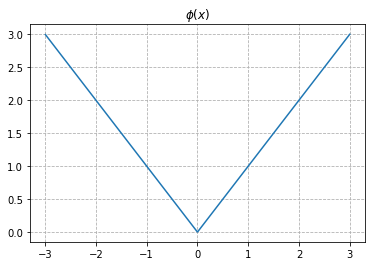

In [59]:
a, b = -3, 3
N = 1000
#N = int(input())
x = sorted([get_x(a, b) for i in range(N)])
y = get_y(x)
plt.plot(x, y)
plt.title("$\phi(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 2. Вариационный ряд и эмпирическая функция распределения

In [60]:
unique, counts = np.unique(y, return_counts=True)
Y = dict(zip(unique, counts))
Y

{0.002588125206791858: 1,
 0.004411543998944278: 1,
 0.006776648134442453: 1,
 0.009364238219079724: 1,
 0.010734734898477427: 1,
 0.011076281230882223: 1,
 0.01266750027944763: 1,
 0.016176442365772203: 1,
 0.017256449800186147: 1,
 0.018726694395551746: 1,
 0.022170981857687178: 1,
 0.03441248329498148: 1,
 0.034421678304997094: 1,
 0.03511114275485561: 1,
 0.03766701276357498: 1,
 0.039268740855850304: 1,
 0.042960223356089955: 1,
 0.05379071087469578: 1,
 0.05597772373556609: 1,
 0.05682537335044202: 1,
 0.05682728736652143: 1,
 0.06377249647761563: 1,
 0.06839356927063411: 1,
 0.0693242021387972: 1,
 0.06970974227328641: 1,
 0.07134221236211058: 1,
 0.08459503326626017: 1,
 0.08538954324252135: 1,
 0.08821861800120523: 1,
 0.08987187245702932: 1,
 0.09054063822294456: 1,
 0.09057569495852791: 1,
 0.09238886313232175: 1,
 0.09415726432144389: 1,
 0.1034086672694321: 1,
 0.10625420682783826: 1,
 0.10934968613870577: 1,
 0.10942506070906166: 1,
 0.114707859702885: 1,
 0.1148512361431

In [61]:
def F_y_emp(X, x0):
    count = 0
    for i in X:
        if i <= x0:
            count += 1
    return count / len(X)

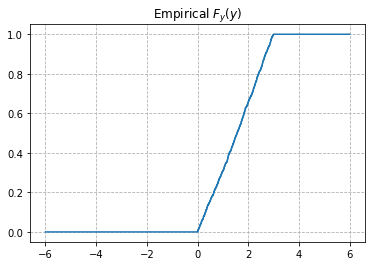

In [63]:
f_y_emp = [F_y_emp(Y, y) for y in Y.keys()]

interval_x = [2*a, list(Y.keys())[0]]
interval_y = [0, 0]
for i in range(len(list(Y.keys()))-1):
    interval_x.append(list(Y.keys())[i])
    interval_y.append(f_y_emp[i])
    interval_x.append(list(Y.keys())[i+1])
    interval_y.append(f_y_emp[i])
interval_x.append(list(Y.keys())[-1])
interval_y.append(1)
interval_x.append(2*b)
interval_y.append(1)
    
plt.plot(interval_x, interval_y)
plt.title("Empirical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 3. Теоритически находим функцию распределения

<img src="images/Lab1_3.jpg" width="450">

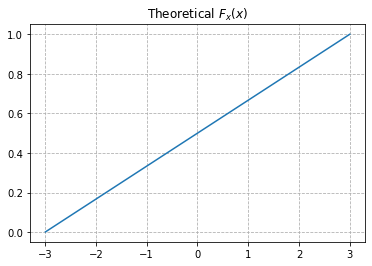

In [65]:
def F_x_ther(t):
    if t < -3:
        return 0
    elif t > 3:
        return 1
    else:
        return (t - a) / (b - a)  

plt.plot(x, [F_x_ther(x_0) for x_0 in x])
plt.title("Theoretical $F_x(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

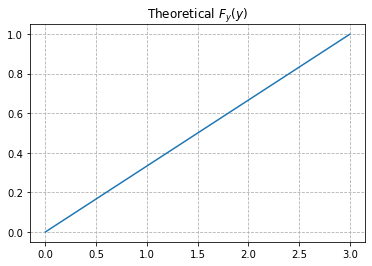

In [66]:
def F_y_ther(y):
    if y < 0:
        return 0
    else:
        return F_x_ther(y) - F_x_ther(-y)

f_y_ther = [F_y_ther(y0) for y0 in list(Y.keys())]
plt.plot(list(Y.keys()), f_y_ther)
plt.title("Theoretical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### Сравниваем теоритческую и эмпирическую

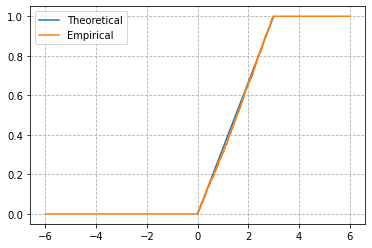

In [67]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(interval_x, interval_y, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()